In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
import ast
from itertools import chain

In [6]:

import matplotlib.pyplot as plt

In [4]:
file_path = '/content/drive/MyDrive/final project sample data/tmdb2024.csv'
movie = pd.read_csv(file_path, index_col=0)

In [11]:
movie['Genres']

0                 ['Action', 'Science Fiction', 'Adventure']
1                  ['Adventure', 'Drama', 'Science Fiction']
2                   ['Drama', 'Action', 'Crime', 'Thriller']
3          ['Action', 'Adventure', 'Fantasy', 'Science Fi...
4                 ['Science Fiction', 'Action', 'Adventure']
                                 ...                        
1019124                         ['Action', 'Crime', 'Drama']
1019154                                      ['Documentary']
1019164                                      ['Documentary']
1019166                                      ['Documentary']
1019186                                  ['Drama', 'Family']
Name: Genres, Length: 139072, dtype: object

In [5]:
movie

,id,title,vote_average,vote_count,imdb_id,popularity,poster_path,Genres,Release_Year,Release_Era
0,27205,Inception,8.364,34495,tt1375666,83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"['Action', 'Science Fiction', 'Adventure']",2010,mid
1,157336,Interstellar,8.417,32571,tt0816692,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"['Adventure', 'Drama', 'Science Fiction']",2014,mid
2,155,The Dark Knight,8.512,30619,tt0468569,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"['Drama', 'Action', 'Crime', 'Thriller']",2008,old
3,19995,Avatar,7.573,29815,tt0499549,79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2009,old
4,24428,The Avengers,7.710,29166,tt0848228,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"['Science Fiction', 'Action', 'Adventure']",2012,mid
...,...,...,...,...,...,...,...,...,...,...
1019124,673629,Black Wolf,0.000,0,tt10393330,0.616,/1E2wJPuaC8lN9EerSrN4Hwi2oa8.jpg,"['Action', 'Crime', 'Drama']",2022,latest
1019154,673384,Two Types: The Faces of Britain,0.000,0,tt7206158,0.600,/1sEz0xKALKiW3kmSw4tSYzVNpQM.jpg,['Documentary'],2017,mid
1019164,673405,Suddenly Homesick,0.000,0,tt11189058,0.600,/c8aA4gtVbKIqSZgEhAyaA5CRaEF.jpg,['Documentary'],2019,mid
1019166,673409,Lebbeus Woods + Steven Holl: The Practice of A...,0.000,0,tt2822964,0.600,/A2ITuES07G7HhaOzrtC2PTtI2Jp.jpg,['Documentary'],2012,mid


In [7]:
data=movie.groupby('Release_Era').size()

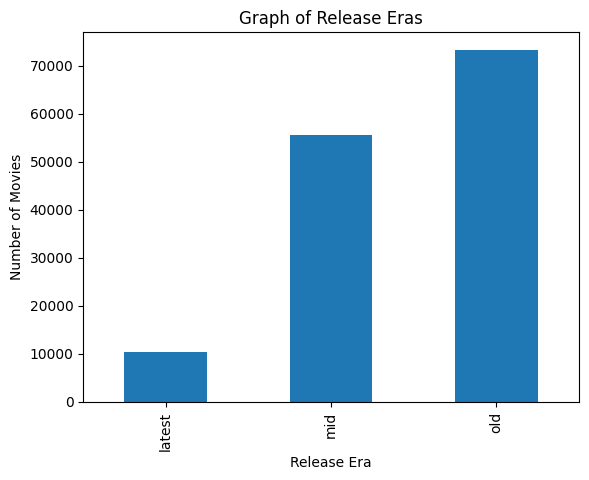

In [10]:
data.plot(kind='bar')
plt.xlabel("Release Era")
plt.ylabel("Number of Movies")
plt.title("Graph of Release Eras")
plt.show()

In [15]:
from collections import Counter
import ast

In [17]:



# Load your DataFrame here
# For example: df = pd.read_csv('your_file.csv')

# Assuming the genres are stored as strings that look like lists
def parse_genres(genre_string):
    try:
        # Safely evaluate the string to a list
        return ast.literal_eval(genre_string)
    except ValueError:
        return []  # Return an empty list if there's an error in conversion

# Apply the parsing function to each genre string in the DataFrame
df_parsed = pd.DataFrame({
    'Parsed_Genres': movie['Genres'].apply(parse_genres)
})

# Flatten the list of lists from the 'Parsed_Genres' column and count each genre
genre_counts = Counter(genre for sublist in df_parsed['Parsed_Genres'] for genre in sublist)

# Display the counts
genre_counts

Counter({'Action': 13475,
         'Science Fiction': 7552,
         'Adventure': 7536,
         'Drama': 46992,
         'Crime': 10901,
         'Thriller': 17770,
         'Fantasy': 5463,
         'Comedy': 33457,
         'Romance': 14881,
         'Western': 4297,
         'Mystery': 6538,
         'War': 2811,
         'Animation': 8603,
         'Family': 7761,
         'Horror': 16307,
         'Music': 8699,
         'History': 3663,
         'TV Movie': 11040,
         'Documentary': 27621})

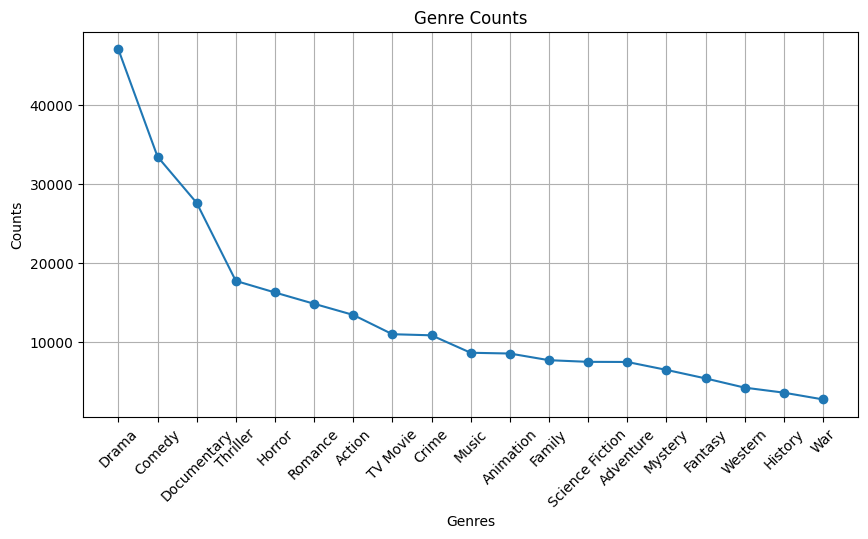

In [18]:
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Unpacking the sorted items
genres, counts = zip(*sorted_genres)

# Creating the line graph
plt.figure(figsize=(10, 5))
plt.plot(genres, counts, marker='o')  # Using a circle marker
plt.title('Genre Counts')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate genre names for better readability
plt.grid(True)
plt.show()

In [22]:
df_filtered = movie[(movie['vote_average'] > 0) & (movie['vote_count'] > 0) & (movie['popularity'] > 0)]


In [27]:
import seaborn as sns

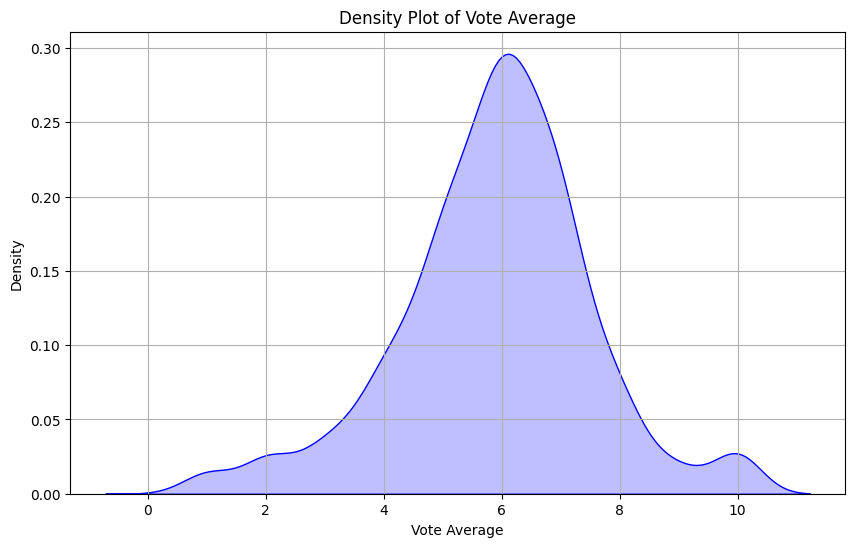

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtered['vote_average'], fill=True, bw_adjust=2.5, color='blue')  # Increased bandwidth
plt.title('Density Plot of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [34]:
hm= movie[['vote_average','vote_count','popularity','Release_Year']]

In [35]:
hm.corr()

,vote_average,vote_count,popularity,Release_Year
vote_average,1.000000,0.125172,0.105810,-0.023214
vote_count,0.125172,1.000000,0.261578,0.045466
popularity,0.105810,0.261578,1.000000,0.040081
Release_Year,-0.023214,0.045466,0.040081,1.000000


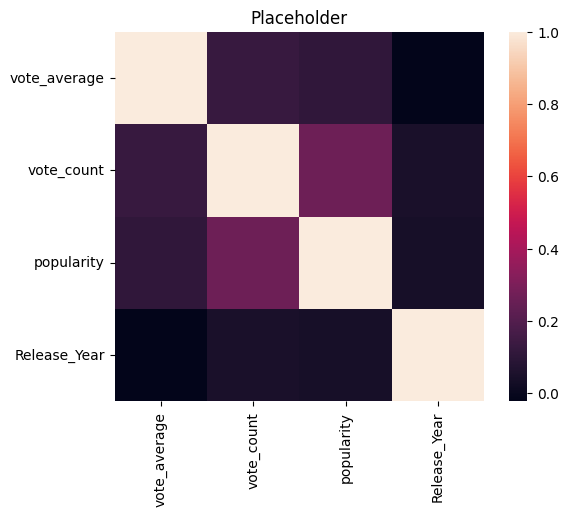

In [37]:
sns.heatmap(hm.corr(), square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("Placeholder")
plt.show()